In [0]:
from keras import backend as K   #Impoprting Keras libraries
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Input, Activation, Flatten, Dense, Dropout, Softmax, Lambda
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.utils import np_utils
import tensorflow as tf


In [0]:
from keras.datasets import cifar10    #Importing CIFAR10 from keras 
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data() # loading the CIFAR10 into train and test variables
num_train, img_channels, img_rows, img_cols =  train_features.shape #Setting number of image channels, coloums, rows
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

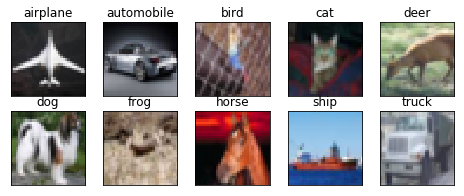

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',  # Plotting 10 images of different classes present in CIFAR10
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):                   #Function to plot the graph of accuracy and loss
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255           #Dividing the train and test data by color range of the image
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:


input=Input(shape=(32, 32, 3))
#input1=input



Layer1=Convolution2D(16, 3, 3, border_mode='same', activation='relu', name='layer1')(input)
Layer1=BatchNormalization()(Layer1)
Layer1=Dropout(0.25)(Layer1)
Layer2=Convolution2D(32, 3, 3, activation='relu', name='layer2')(Layer1)
Layer2=BatchNormalization()(Layer2)
Layer2=Dropout(0.25)(Layer2)
Layer3=Convolution2D(64, 3, 3, border_mode='same', activation='relu', name='layer3')(Layer2)
Layer3=BatchNormalization()(Layer3)
Layer3=Dropout(0.25)(Layer3)
Layer4=Convolution2D(128, 3, 3, activation='relu', name='layer4')(Layer3)
Layer4=BatchNormalization()(Layer4)
Layer4=Dropout(0.25)(Layer4)
Layer5=Convolution2D(256, 3, 3, border_mode='same', activation='relu', name='layer5')(Layer4)
Layer5=BatchNormalization()(Layer5)
Layer5=Dropout(0.25)(Layer5)
Layer6=Convolution2D(10, 1, 1, activation='relu', name='layer6')(Layer5)
Layer6=MaxPooling2D(2, 2)(Layer6)

Layer7=Convolution2D(16, 3, 1, activation='relu', name='layer7')(Layer6)
Layer7=BatchNormalization()(Layer7)
Layer7=Dropout(0.25)(Layer7)
Layer8=Convolution2D(32, 1, 3, activation='relu', name='layer8')(Layer7)
Layer8=BatchNormalization()(Layer8)
Layer8=Dropout(0.25)(Layer8)
Layer9=SeparableConv2D(64, 3, 3, border_mode='same', activation='relu', name='layer9' )(Layer8)
Layer9=BatchNormalization()(Layer9)
Layer9=Dropout(0.25)(Layer9)
Layer10=SeparableConv2D(128, 3, 3, activation='relu', name='layer10' )(Layer9)
Layer10=BatchNormalization()(Layer10)
Layer10=Dropout(0.25)(Layer10)
Layer11=Convolution2D(10, 1, 1, activation='relu', name='layer11')(Layer10)
Layer11=MaxPooling2D(2, 2)(Layer11)

SkipConection1=Layer11

Layer12=Convolution2D(16, 3, 3, border_mode='same', activation='relu', name='layer12')(input)
Layer12=BatchNormalization()(Layer12)
Layer12=Dropout(0.25)(Layer12)
Layer13=Convolution2D(32, 3, 3, activation='relu', name='layer13')(Layer12)
Layer13=BatchNormalization()(Layer13)
Layer13=Dropout(0.25)(Layer13)
Layer14=Convolution2D(64, 5, 5, border_mode='same', activation='relu', name='layer14')(Layer13)
Layer14=BatchNormalization()(Layer14)
Layer14=Dropout(0.25)(Layer14)
Layer15=Convolution2D(128, 5, 5, activation='relu', name='layer15')(Layer14)
Layer15=BatchNormalization()(Layer15)
Layer15=Dropout(0.25)(Layer15)
Layer16=Convolution2D(256, 5, 5, activation='relu', name='layer16')(Layer15)
Layer16=BatchNormalization()(Layer16)
Layer16=Dropout(0.25)(Layer16)
Layer17=Convolution2D(10, 1, 1,activation='relu', name='layer17')(Layer16)
Layer17=MaxPooling2D(2,2)(Layer17)

Layer18=Convolution2D(16, 3, 3, border_mode='same', activation='relu', name='layer18')(Layer17)
Layer18=BatchNormalization()(Layer18)
Layer18=Dropout(0.25)(Layer18)
Layer19=Convolution2D(32, 3, 3, activation='relu', name='layer19')(Layer18)
Layer19=BatchNormalization()(Layer19)
Layer19=Dropout(0.25)(Layer19)
Layer20=Convolution2D(64, 5, 5, border_mode='same', activation='relu', name='layer20')(Layer19)
Layer20=BatchNormalization()(Layer20)
Layer20=Dropout(0.25)(Layer20)
Layer21=Convolution2D(128, 5, 5, activation='relu', name='layer21')(Layer20)
Layer21=BatchNormalization()(Layer21)
Layer21=Dropout(0.25)(Layer21)

SkipConection2=Layer21


Layer22=Convolution2D(16, 3, 3, border_mode='same', activation='relu', name='layer22')(input)
Layer22=BatchNormalization()(Layer1)
Layer22=Dropout(0.25)(Layer1)
Layer23=Convolution2D(32, 3, 3, activation='relu', dilation_rate=1, name='layer23')(Layer22)
Layer23=BatchNormalization()(Layer23)
Layer23=Dropout(0.25)(Layer23)
Layer24=Convolution2D(64, 3, 3, activation='relu', dilation_rate=2, name='layer24')(Layer23)
Layer24=BatchNormalization()(Layer24)
Layer24=Dropout(0.25)(Layer24)
Layer25=Convolution2D(128, 3, 3, activation='relu', dilation_rate=2, name='layer25')(Layer24)
Layer25=BatchNormalization()(Layer25)
Layer25=Dropout(0.25)(Layer25)
Layer26=Convolution2D(10, 1, 1, activation='relu', name='layer26')(Layer25)
Layer26=MaxPooling2D(2, 2)(Layer26)


Layer27=Convolution2D(16, 3, 3, activation='relu', dilation_rate=1, name='layer27')(Layer26)
Layer27=BatchNormalization()(Layer27)
Layer27=Dropout(0.25)(Layer27)
Layer28=Convolution2D(32, 3, 3, activation='relu', dilation_rate=2, name='layer28')(Layer27)
Layer28=BatchNormalization()(Layer28)
Layer28=Dropout(0.25)(Layer28)


Layer29=concatenate([SkipConection1, SkipConection2, Layer28])

Layer30=Convolution2D(128, 5, 5, activation='relu', name='layer30')(Layer29)
Layer31=Convolution2D(10, 1, 1, activation='relu', name='layer31')(Layer30)
Layer31=BatchNormalization()(Layer31)
Layer31=Dropout(0.25)(Layer31)


Layer32 = Flatten()(Layer31)

output = Softmax()(Layer32)

model = Model(inputs=[input], outputs=[output])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()












W0615 11:45:15.053958 140311114807168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 11:45:15.067597 140311114807168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", name="layer1", padding="same")`
  
W0615 11:45:15.071596 140311114807168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 11:45:15.096693 140311114807168 deprecation_wrapper.py:119] From /usr/local/lib/p

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
layer1 (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          layer1[0][0]                     
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
layer12 (C

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]
W0615 11:45:30.259750 140311114807168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed 

Epoch 1/50
390/390 [==============================] - 99s 254ms/step - loss: 1.8234 - acc: 0.3528 - val_loss: 1.6315 - val_acc: 0.4257
Epoch 2/50
390/390 [==============================] - 91s 234ms/step - loss: 1.4704 - acc: 0.4805 - val_loss: 1.1997 - val_acc: 0.5933
Epoch 3/50
390/390 [==============================] - 91s 232ms/step - loss: 1.3212 - acc: 0.5320 - val_loss: 1.0822 - val_acc: 0.6409
Epoch 4/50
390/390 [==============================] - 91s 233ms/step - loss: 1.2082 - acc: 0.5704 - val_loss: 0.9527 - val_acc: 0.6989
Epoch 5/50
390/390 [==============================] - 91s 234ms/step - loss: 1.1370 - acc: 0.5951 - val_loss: 0.9347 - val_acc: 0.6980
Epoch 6/50
390/390 [==============================] - 91s 234ms/step - loss: 1.0794 - acc: 0.6150 - val_loss: 0.8675 - val_acc: 0.7178
Epoch 7/50
390/390 [==============================] - 91s 234ms/step - loss: 1.0364 - acc: 0.6235 - val_loss: 0.9040 - val_acc: 0.6978
Epoch 8/50
390/390 [==============================] - 9

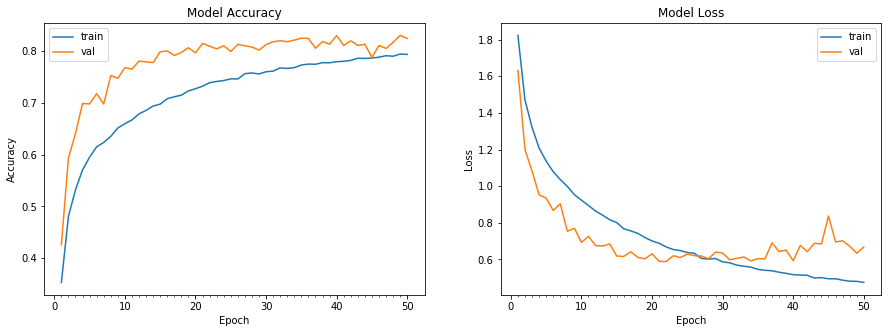

Accuracy on test data is: 82.45


In [9]:

from keras.preprocessing.image import ImageDataGenerator # Imagedatagenerator library is used for data augmentation with no horizontal flips

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))